<a href="https://colab.research.google.com/github/commitit/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path_to_csv = '/content/gdrive/MyDrive/Data/review.csv'

Mounted at /content/gdrive


In [ ]:
 df = pd.read_csv(path_to_csv)
 df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

positive    25000
negative    25000
Name: sentiment, dtype: int64


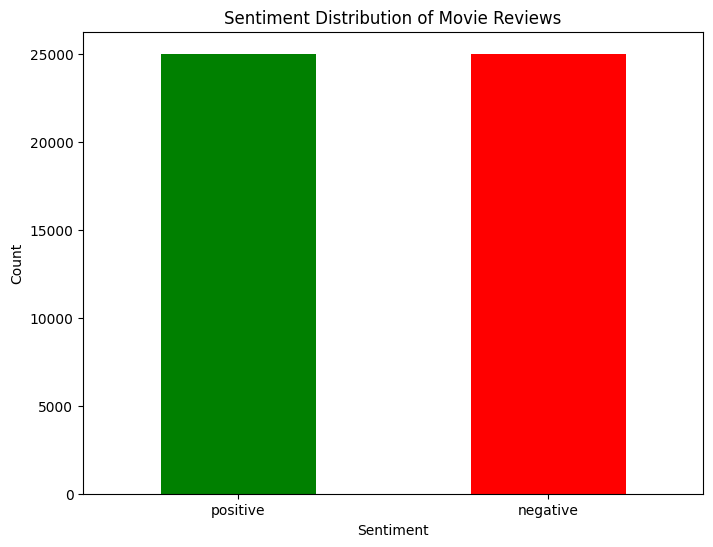

In [ ]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red']) #  green for positive and red for negative
plt.title('Sentiment Distribution of Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0) # Rotating x-axis labels for better readability
plt.show()

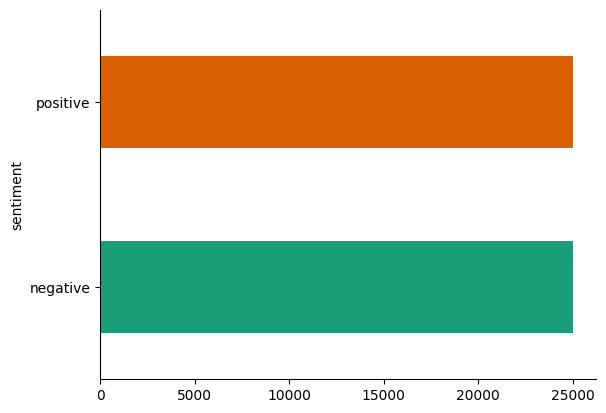

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Process the data

We need our data in a certain format before we pass it to the Bert base uncased, this model requires input_ids, token_type_ids, attention_mask, label, and text.

https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoTokenizer

In [ ]:
#converting text to tokens with AutoTokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def process_text(row):

  text = row['review']
  text = str(text)
  text = ''.join(text.split())

  encodings = tokenizer(text, padding = 'max_length', truncation = True, max_length= 124)

  label = 0
  if row['sentiment'] == 'positive':
    label += 1

  encodings['label'] = label
  encodings['text'] = text

  return encodings